### Звездный войны
##### Предсказать количество транспортников, истребителей, крейсеров

In [5]:
import pandas as pd
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [21]:
data_train = pd.read_csv ('https://stepic.org/media/attachments/course/4852/invasion.csv')
data_train

,class,g_reflection,i_reflection,speed,brightness,time_of_observance,volume
0,transport,2.190672,6.716633,62.168208,0.347465,158221,44.932446
1,transport,3.453276,8.995909,62.994707,0.590094,385972,41.568300
2,transport,2.432994,6.938691,62.245807,0.329288,446482,40.123467
3,fighter,6.083763,3.019459,18.474555,0.174738,210125,11.384865
4,fighter,12.876769,2.452950,195.805771,0.150446,23109,11.328806
...,...,...,...,...,...,...,...
495,fighter,9.901731,7.162124,58.095069,0.145065,395762,12.901909
496,transport,3.574132,7.118835,62.928159,0.469670,435926,39.926551
497,fighter,9.186049,4.580781,412.102112,0.108195,299594,12.178203
498,fighter,8.278256,8.353756,268.121561,0.132661,361911,13.905809


In [22]:
X = data_train.drop (['class'], axis = 1)
X.head()

,g_reflection,i_reflection,speed,brightness,time_of_observance,volume
0,2.190672,6.716633,62.168208,0.347465,158221,44.932446
1,3.453276,8.995909,62.994707,0.590094,385972,41.568300
2,2.432994,6.938691,62.245807,0.329288,446482,40.123467
3,6.083763,3.019459,18.474555,0.174738,210125,11.384865
4,12.876769,2.452950,195.805771,0.150446,23109,11.328806


In [23]:
y = data_train ['class']

In [24]:
# Разбивка на тренировочную и тестовую
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [25]:
X_train.shape

(335, 6)

In [26]:
X_test.shape

(165, 6)

In [27]:
# Обучение
clf = tree.DecisionTreeClassifier (criterion = 'entropy')
clf

DecisionTreeClassifier(criterion='entropy')

In [28]:
clf.fit (X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [29]:
clf.score(X_train, y_train)

1.0

[Text(133.92000000000002, 181.2, 'X[3] <= 0.252\nentropy = 1.445\nsamples = 335\nvalue = [47, 145, 143]'),
 Text(66.96000000000001, 108.72, 'entropy = 0.0\nsamples = 145\nvalue = [0, 145, 0]'),
 Text(200.88000000000002, 108.72, 'X[0] <= 6.936\nentropy = 0.807\nsamples = 190\nvalue = [47, 0, 143]'),
 Text(133.92000000000002, 36.23999999999998, 'entropy = 0.0\nsamples = 143\nvalue = [0, 0, 143]'),
 Text(267.84000000000003, 36.23999999999998, 'entropy = 0.0\nsamples = 47\nvalue = [47, 0, 0]')]

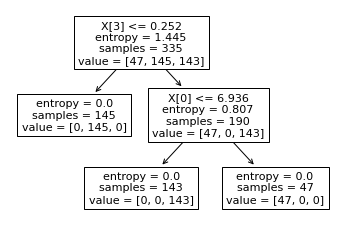

In [30]:
tree.plot_tree(clf)

In [41]:
data_test = pd.read_csv ('https://stepic.org/media/attachments/course/4852/operative_information.csv')
data_test

,g_reflection,i_reflection,speed,brightness,time_of_observance,volume
0,7.516543,3.916691,513.954279,0.177247,105908,13.267224
1,4.322988,6.967689,63.752970,0.545922,277855,39.833130
2,4.595724,9.098297,62.233948,0.389201,160662,42.014556
3,2.689675,7.964869,62.475495,0.541081,162092,42.056829
4,8.075576,5.169719,336.441261,0.174757,466853,11.779813
...,...,...,...,...,...,...
1495,11.755466,5.583147,325.069957,0.170644,388400,13.210917
1496,12.220137,4.023177,439.975574,0.163958,195305,13.819358
1497,1.611053,7.864930,65.025106,0.430021,307856,47.369083
1498,7.114131,5.532188,391.178342,0.150117,51590,12.447761


In [ ]:
# tolist() возвращает список значений

In [47]:
clf.predict(data_test).tolist().count('cruiser')

230

In [48]:
clf.predict(data_test).tolist().count('transport')

595

In [49]:
clf.predict(data_test).tolist().count('fighter')

675